# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">سایر روشهای Object Tracking</div>

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">ابتدا برای این نوت بوک opencv-contrib را نصب کنید</div>

```python -m pip install opencv-contrib-python```

# Tracker Class in OpenCV

1. BOOSTING
2. MIL 
3. KCF 
4. CRST
4. TLD 
 * Tends to recover from occulusions
5. MEDIANFLOW 
 * Good for predictable slow motion
6. GOTURN
 * Deep Learning based
 * Most Accurate 
7. MOSSE
 * Fastest

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">لود کتابخانه‌های مورد نیاز</div>

In [12]:
import cv2
import os
import matplotlib.pyplot as plt

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">آدرس ویدیو برای تست الگوریتمها</div>

In [13]:
video_input_file_name = "videos/race_car.mp4"

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">توابع کمکی</div>

In [14]:

def drawRectangle(frame, bbox):
    p1 = (int(bbox[0]), int(bbox[1]))
    p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
    cv2.rectangle(frame, p1, p2, (255,0,0), 2, 1)

def displayRectangle(frame, bbox):
    plt.figure(figsize=(20,10))
    frameCopy = frame.copy()
    drawRectangle(frameCopy, bbox)
    frameCopy = cv2.cvtColor(frameCopy, cv2.COLOR_RGB2BGR)
    plt.imshow(frameCopy); plt.axis('off')    



# Create the Tracker instance

In [15]:
# Set up tracker
tracker_types = ['BOOSTING', 'MIL','KCF', 'CSRT', 'TLD', 'MEDIANFLOW', 'GOTURN','MOSSE']

# Change the index to change the tracker type
tracker_type = tracker_types[6]

if tracker_type == 'BOOSTING':
    tracker = cv2.legacy_TrackerBoosting.create()
elif tracker_type == 'MIL':
    tracker = cv2.TrackerMIL_create()
elif tracker_type == 'KCF':
    tracker = cv2.TrackerKCF_create()
elif tracker_type == 'CSRT':
    tracker = cv2.legacy_TrackerCSRT.create()
elif tracker_type == 'TLD':
    tracker = cv2.legacy_TrackerTLD.create()
elif tracker_type == 'MEDIANFLOW':
    tracker = cv2.legacy_TrackerMedianFlow.create()
elif tracker_type == 'GOTURN':
    tracker = cv2.TrackerGOTURN_create()   
else:
    tracker = cv2.legacy_TrackerMOSSE.create()

# Read input video & Setup output Video

In [16]:
# Read video
video = cv2.VideoCapture(video_input_file_name)
ok, frame = video.read()

# Exit if video not opened
if not video.isOpened():
    print("Could not open video")
else : 
    width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
    
video_output_file_name = 'race_car-' + tracker_type + '.mp4'
video_out = cv2.VideoWriter(video_output_file_name,cv2.VideoWriter_fourcc(*'avc1'), 10, (width, height))

# Define Bounding Box

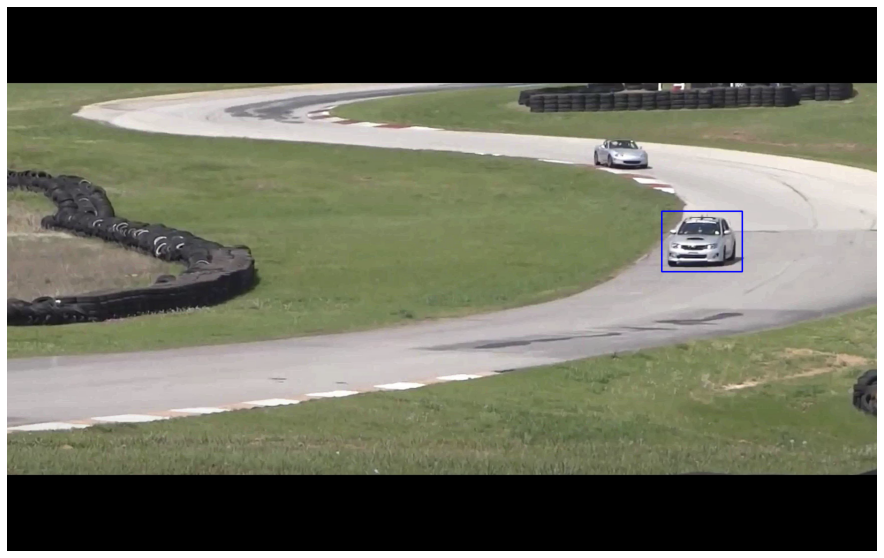

In [17]:
# Define a bounding box
bbox = (1300, 405, 160, 120)
#bbox = cv2.selectROI(frame, False)
#print(bbox)
displayRectangle(frame,bbox)

# Intilialize Tracker 

1. One frame
2. A bounding box 


In [18]:
# Initialize tracker with first frame and bounding box

ok = tracker.init(frame, bbox)

# Read frame and Track Object

In [21]:
while True:
    ok, frame = video.read()
    if not ok:
        break 
    
    # Start timer
    tm = cv2.TickMeter()

    tm.start()
    ok, bbox = tracker.update(frame)
    tm.stop()
    # Draw bounding box
    if ok:
        drawRectangle(frame, bbox)
    else :
        cv2.putText(frame, "Tracking failure detected", (80,140), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3)

    # Display Info
    cv2.putText(frame, tracker_type + " Tracker", (80,60), cv2.FONT_HERSHEY_SIMPLEX, 1, (50, 170, 50), 3)
    cv2.putText(frame, "FPS : " + str(tm.getFPS()), (80,100), cv2.FONT_HERSHEY_SIMPLEX, 1, (50, 170, 50), 3)


    # Write frame to video
    video_out.write(frame)
    
video.release()
video_out.release()

In [22]:
from IPython.display import HTML
HTML("""
<video width=1024 controls>
  <source src="race_car-GOTURN.mp4" type="video/mp4">
</video>
""")

Source: https://opencv.org/opencv-free-course/